In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

In [3]:
df = pd.read_csv("cleared_data.csv")
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(62087, 49)
(48218, 49)


<Axes: >

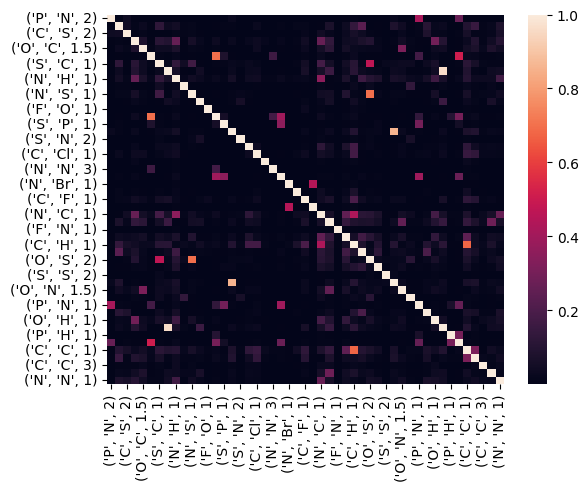

In [4]:
sns.heatmap(df.corr().abs())

In [5]:
def corrFilter(X: pd.DataFrame, bound: float):
    xCorr = X.corr().abs()
    xFiltered = xCorr[(xCorr >= bound) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates()
    return xFlattened

# pick the most correlated features, returns list of features
def feature_pick(X: pd.DataFrame, treshold = 0.0, total_features = None):
    filtered = corrFilter(X, treshold)
    if not total_features:
        features = filtered
    else:
        features = filtered[:total_features]
        
    indexes = features.index
    feature = np.reshape([[j for j in i] for i in indexes], (-1))
    return np.unique(feature)

In [6]:
corrFilter(df, bound=0)[:10]

('S', 'H', 1)   ('S', 'C', 1.5)    0.961117
('O', 'N', 1)   ('O', 'N', 2)      0.856499
('O', 'P', 1)   ('P', 'O', 2)      0.698728
('N', 'S', 1)   ('O', 'S', 2)      0.696939
('C', 'H', 1)   ('C', 'C', 1)      0.676069
('P', 'C', 1)   ('P', 'O', 2)      0.509863
('O', 'S', 2)   ('S', 'C', 1)      0.472384
('N', 'Cl', 1)  ('N', 'Br', 1)     0.447199
('C', 'H', 1)   ('N', 'C', 1)      0.426656
('P', 'N', 1)   ('P', 'N', 2)      0.415292
dtype: float64

<Axes: xlabel="('S', 'C', 1.5)", ylabel='Density'>

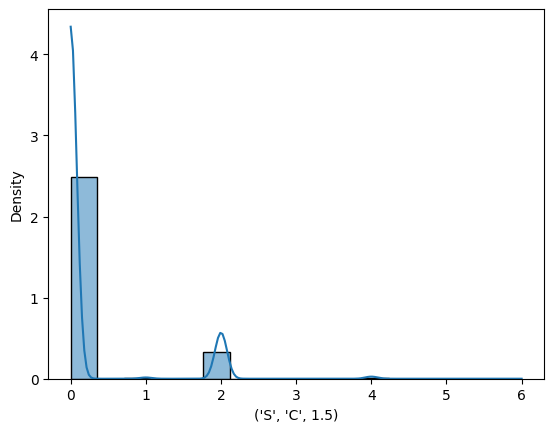

In [16]:
sns.histplot(x = df["('S', 'C', 1.5)"], kde=True, stat="density")

In [18]:
for columns in df.columns:
    sns.histplot(x = df[columns], kde=True, stat="density")
    plt.savefig("Datas/{}.png".format(columns))
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [30]:
for columns in df.columns:
    if statistics.variance(df[columns]) > 1 :
        print(columns, statistics.variance(df[columns]))

('O', 'C', 1) 2.5322062387958377
('N', 'H', 1) 1.3692906856847764
('N', 'C', 1) 7.832009113578711
('N', 'C', 1.5) 2.131699756895539
('C', 'H', 1) 33.81524177599383
('C', 'C', 1) 11.77672487967243
('C', 'C', 1.5) 15.724525899219664
